## Assignment 1: Introduction to Data Science and Python
### Stefan Dimitrov Velev, 0MI3400521, Big Data Technologies
### Faculty of Mathematics and Informatics, Sofia University

#### 1. Import required Python packages

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 2. Read the CSV file - **Life expectancy vs. GDP per capita, 2022**
*Data source: UN, World Population Prospects (2024); World Bank (2023)*

https://ourworldindata.org/grapher/life-expectancy-un-vs-gdp-per-capita-wb

In [327]:
df = pd.read_csv('./data/life-expectancy-un-vs-gdp-per-capita-wb.csv', delimiter=',')

In [328]:
df.head()

,Entity,Code,Year,Life expectancy - Sex: all - Age: 0 - Variant: estimates,"GDP per capita, PPP (constant 2017 international $)",Population (historical),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,-10000,NaN,NaN,14737.0,NaN
2,Afghanistan,AFG,-9000,NaN,NaN,20405.0,NaN
3,Afghanistan,AFG,-8000,NaN,NaN,28253.0,NaN
4,Afghanistan,AFG,-7000,NaN,NaN,39120.0,NaN


In [329]:
print("The number of rows in the data frame is:", len(df))

The number of rows in the data frame is: 59858


#### 3. Data Cleaning

In [330]:
# Remove the unnecessary columns in the data frame
df = df[['Entity', 'Year', 'Life expectancy - Sex: all - Age: 0 - Variant: estimates', 'GDP per capita, PPP (constant 2017 international $)', 'Population (historical)']]

In [331]:
# Rename the applicable columns
df = df.rename(columns={'Entity': 'Country', 'Life expectancy - Sex: all - Age: 0 - Variant: estimates': 'Life expectancy', 'GDP per capita, PPP (constant 2017 international $)': 'GDP per capita', 'Population (historical)': 'Population'})

In [332]:
# Leaving only rows for year 2022
df = df[df['Year'] == 2022]

In [333]:
# Remove rows with missing values
df = df.dropna()

In [334]:
# Remove not-country-specific entries
df = df[df['Country'] != 'High-income countries']
df = df[df['Country'] != 'Low-income countries']
df = df[df['Country'] != 'Lower-middle-income countries']
df = df[df['Country'] != 'Upper-middle-income countries']
df = df[df['Country'] != 'World']

In [335]:
df[df['Country'] == 'Central African Republic']

,Country,Year,Life expectancy,GDP per capita,Population
10140,Central African Republic,2022,18.818,823.9822,5098038.0


In [336]:
# Correct the Central African Republic life expectancy according the World Bank Report for 2022
# Source: https://data.worldbank.org/indicator/SP.DYN.LE00.IN
df.loc[df['Country'] == 'Central African Republic', 'Life expectancy'] = 54.48

In [337]:
df.count()

Country            188
Year               188
Life expectancy    188
GDP per capita     188
Population         188
dtype: int64

#### 4. Draw a scatter plot of GDP per capita vs Life expectancy for 2022

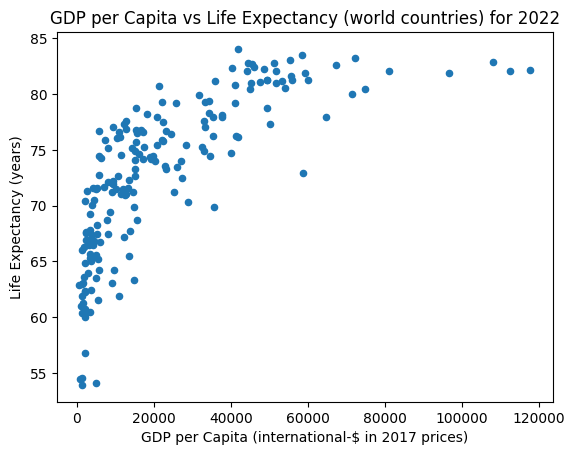

In [338]:
df.plot.scatter(x='GDP per capita', y='Life expectancy')
plt.xlabel('GDP per Capita (international-$ in 2017 prices)')
plt.ylabel('Life Expectancy (years)')
plt.title('GDP per Capita vs Life Expectancy (world countries) for 2022')
plt.show()

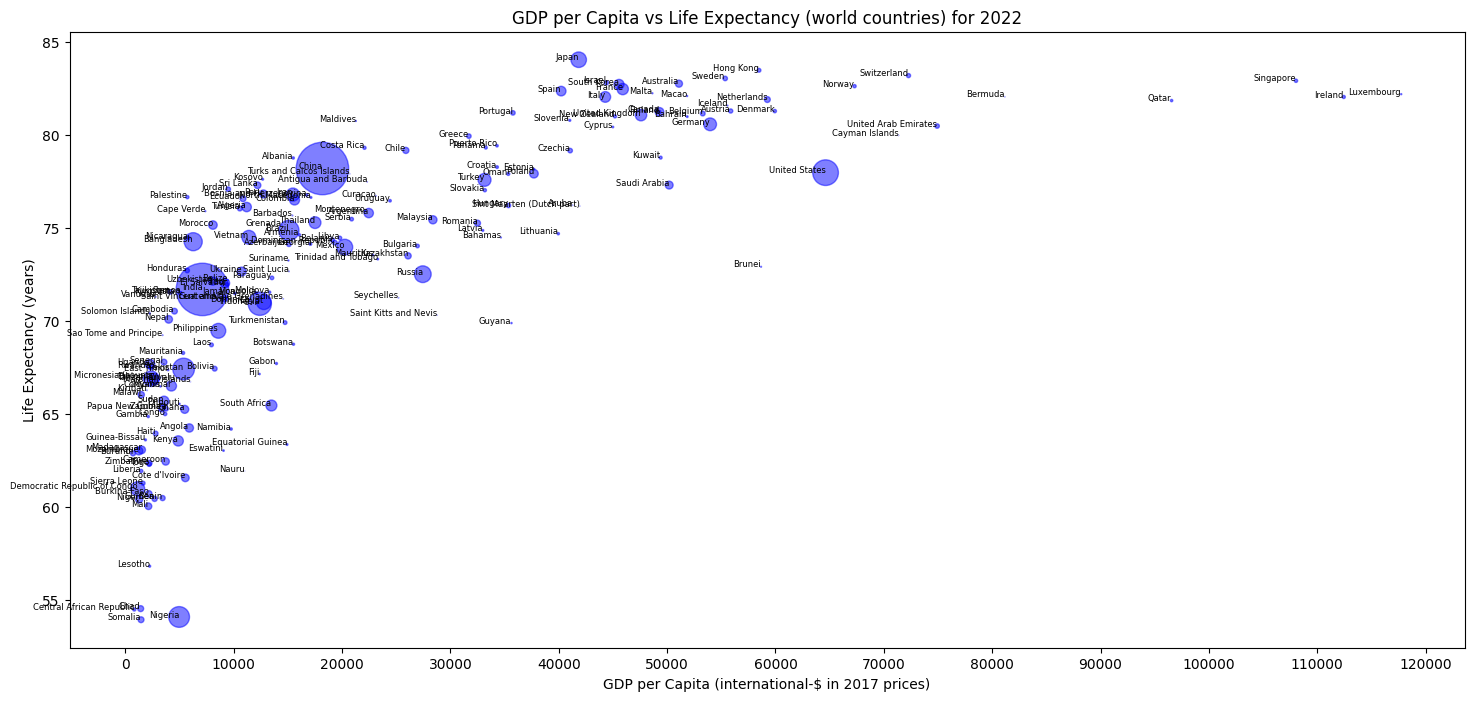

In [339]:
plt.figure(figsize=(18, 8))
plt.scatter(df['GDP per capita'], df['Life expectancy'], color='blue', s = df['Population']/1000000, alpha=0.5)

for i, country in enumerate(df['Country']):
    plt.text(df['GDP per capita'].iloc[i], df['Life expectancy'].iloc[i], df['Country'].iloc[i], fontsize=6, ha='right')
    
plt.xticks([0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000])
plt.xlabel('GDP per Capita (international-$ in 2017 prices)')
plt.ylabel('Life Expectancy (years)')
plt.title('GDP per Capita vs Life Expectancy (world countries) for 2022')
plt.show()


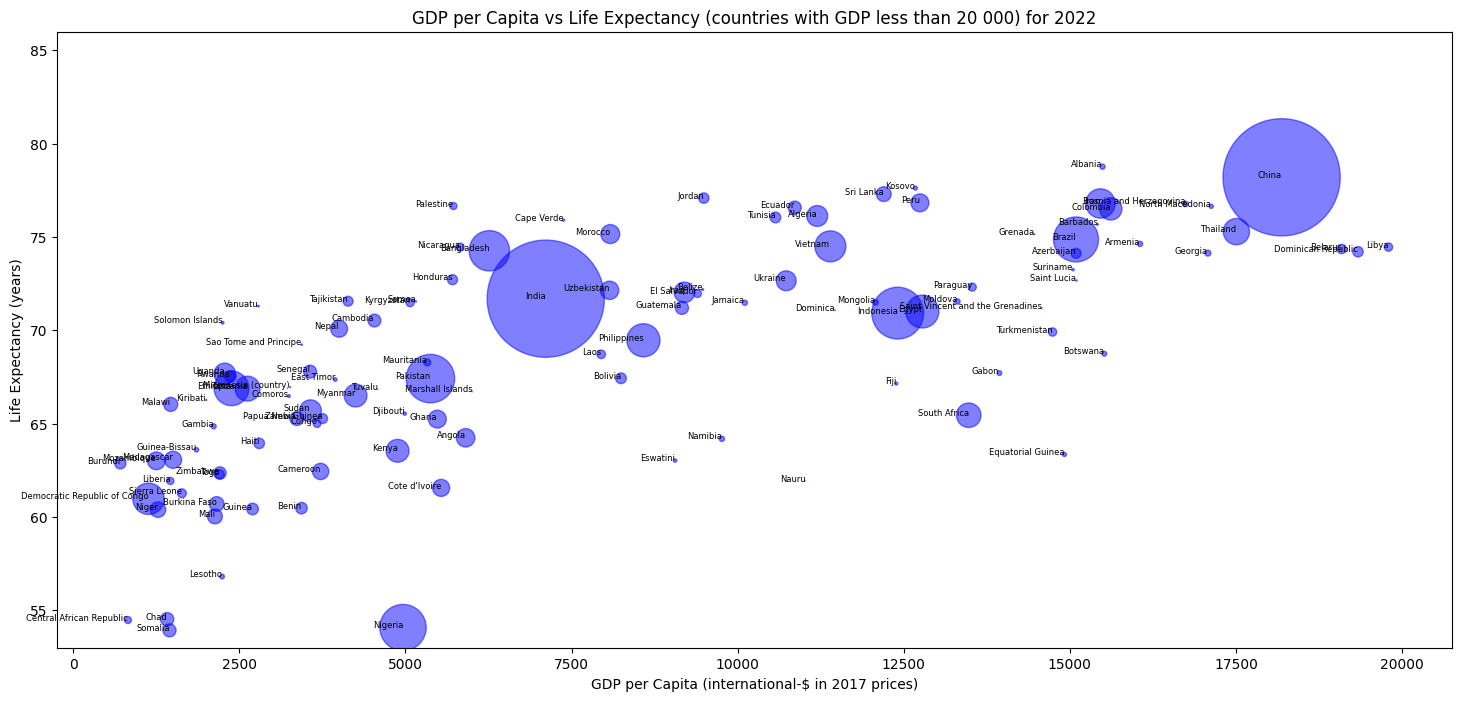

In [340]:
plt.figure(figsize=(18, 8))
df_lower_GDP = df[df['GDP per capita'] <= 20000]
plt.scatter(df_lower_GDP['GDP per capita'], df_lower_GDP['Life expectancy'], color='blue', s = df_lower_GDP['Population']/200000, alpha=0.5)

for i, country in enumerate(df_lower_GDP['Country']):
    plt.text(df_lower_GDP['GDP per capita'].iloc[i], df_lower_GDP['Life expectancy'].iloc[i], df_lower_GDP['Country'].iloc[i], fontsize=6, ha='right')
    
plt.ylim(53, 86)

plt.xlabel('GDP per Capita (international-$ in 2017 prices)')
plt.ylabel('Life Expectancy (years)')
plt.title('GDP per Capita vs Life Expectancy (countries with GDP less than 20 000) for 2022')
plt.show()

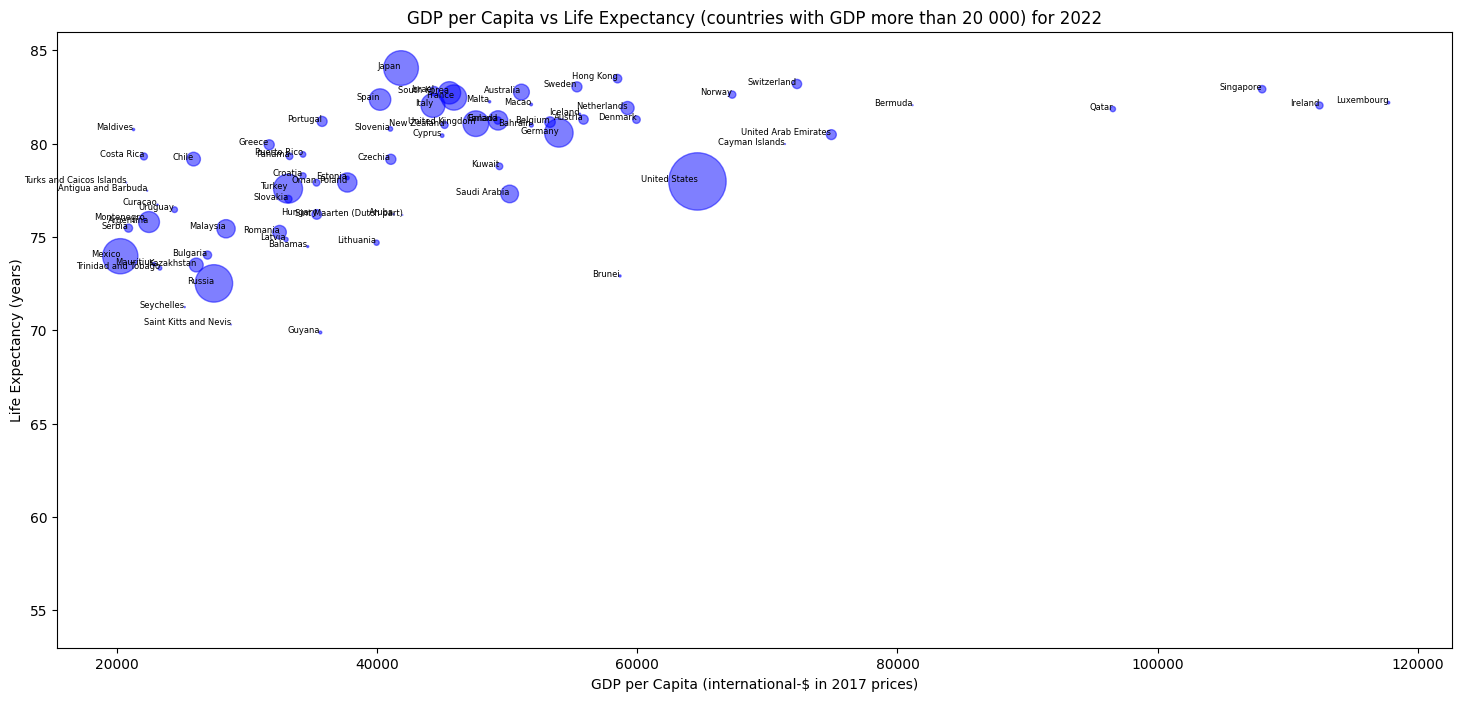

In [341]:
plt.figure(figsize=(18, 8))
df_higher_GDP = df[df['GDP per capita'] >= 20000]
plt.scatter(df_higher_GDP['GDP per capita'], df_higher_GDP['Life expectancy'], color='blue', s = df_higher_GDP['Population']/200000, alpha=0.5)

for i, country in enumerate(df_higher_GDP['Country']):
    plt.text(df_higher_GDP['GDP per capita'].iloc[i], df_higher_GDP['Life expectancy'].iloc[i], df_higher_GDP['Country'].iloc[i], fontsize=6, ha='right')

plt.ylim(53, 86)
        
plt.xlabel('GDP per Capita (international-$ in 2017 prices)')
plt.ylabel('Life Expectancy (years)')
plt.title('GDP per Capita vs Life Expectancy (countries with GDP more than 20 000) for 2022')
plt.show()

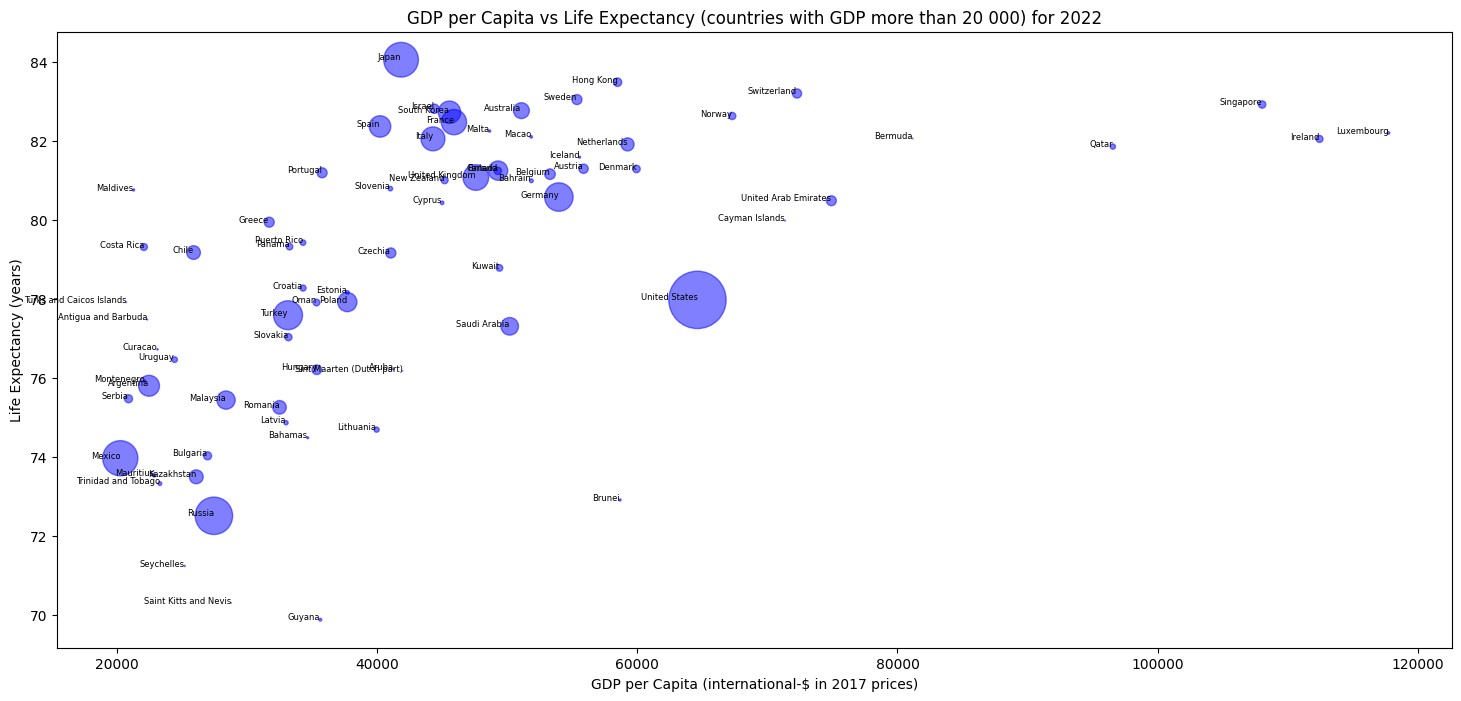

In [342]:
plt.figure(figsize=(18, 8))
plt.scatter(df_higher_GDP['GDP per capita'], df_higher_GDP['Life expectancy'], color='blue', s = df_higher_GDP['Population']/200000, alpha=0.5)

for i, country in enumerate(df_higher_GDP['Country']):
    plt.text(df_higher_GDP['GDP per capita'].iloc[i], df_higher_GDP['Life expectancy'].iloc[i], df_higher_GDP['Country'].iloc[i], fontsize=6, ha='right')
        
plt.xlabel('GDP per Capita (international-$ in 2017 prices)')
plt.ylabel('Life Expectancy (years)')
plt.title('GDP per Capita vs Life Expectancy (countries with GDP more than 20 000) for 2022')
plt.show()

#### 5. Find out which countries have a life expectancy higher than one standard deviation above the mean?

In [343]:
# Get statistic for the whole DataFrame with Pandas
df.describe()

,Year,Life expectancy,GDP per capita,Population
count,188.0,188.000000,188.000000,1.880000e+02
mean,2022.0,72.752750,22643.151954,4.151910e+07
std,0.0,7.039319,22790.551663,1.522105e+08
min,2022.0,53.931000,708.178300,1.001200e+04
25%,2022.0,67.404750,5134.252600,1.831064e+06
50%,2022.0,74.079500,14829.153500,7.917908e+06
75%,2022.0,77.937000,34831.845750,3.040557e+07
max,2022.0,84.054000,117746.990000,1.425423e+09


In [344]:
# Get the average life expectancy and the standard deviation with NumPy
mean_life_expectancy = np.mean(df['Life expectancy'])
standard_deviation_life_expectancy = np.std(df['Life expectancy'])  
print('Mean life expectancy is', mean_life_expectancy)
print('Standard deviation of life expectancy is', standard_deviation_life_expectancy)

Mean life expectancy is 72.75275
Standard deviation of life expectancy is 7.020572922933242


In [345]:
# Find lower boundary for the searched countries - one standard deviation above the mean
lower_boundary_high_life_expectancy = mean_life_expectancy + standard_deviation_life_expectancy
print('The searched lower boundary for high life expectancy is', lower_boundary_high_life_expectancy)

The searched lower boundary for high life expectancy is 79.77332292293325


In [346]:
# List countries with higher life expectancy (one standard deviation above the mean)
df_higher_life_expectancy = df[df['Life expectancy'] > lower_boundary_high_life_expectancy]
print('The number of countries with higher life expectancy is', len(df_higher_life_expectancy))
print('The list of countries with higher life expectancy is',  ', '.join(df_higher_life_expectancy['Country']))

The number of countries with higher life expectancy is 36
The list of countries with higher life expectancy is Australia, Austria, Bahrain, Belgium, Bermuda, Canada, Cayman Islands, Cyprus, Denmark, Finland, France, Germany, Greece, Hong Kong, Iceland, Ireland, Israel, Italy, Japan, Luxembourg, Macao, Maldives, Malta, Netherlands, New Zealand, Norway, Portugal, Qatar, Singapore, Slovenia, South Korea, Spain, Sweden, Switzerland, United Arab Emirates, United Kingdom


#### 6. Check which countries have high life expectancy but have low GDP?

In [347]:
# List countries with high life expectancy but low GDP using means
mean_gdp = np.mean(df['GDP per capita'])
print('Mean GDP per capita is', mean_gdp)
df_higher_life_expectancy_lower_GDP1 = df[(df['Life expectancy'] > mean_life_expectancy) & (df['GDP per capita'] < mean_gdp)]
print('The number of countries with high life expectancy but low GDP per capita using means is', len(df_higher_life_expectancy_lower_GDP1))
print('The list of countries with high life expectancy but low GDP per capita using means is:',  ', '.join(df_higher_life_expectancy_lower_GDP1['Country']))


Mean GDP per capita is 22643.151954255318
The number of countries with high life expectancy but low GDP per capita using means is 38
The list of countries with high life expectancy but low GDP per capita using means is: Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bangladesh, Barbados, Belarus, Bosnia and Herzegovina, Brazil, Cape Verde, China, Colombia, Costa Rica, Dominican Republic, Ecuador, Georgia, Grenada, Iran, Jordan, Kosovo, Libya, Maldives, Mexico, Montenegro, Morocco, Nicaragua, North Macedonia, Palestine, Peru, Serbia, Sri Lanka, Suriname, Thailand, Tunisia, Turks and Caicos Islands, Vietnam


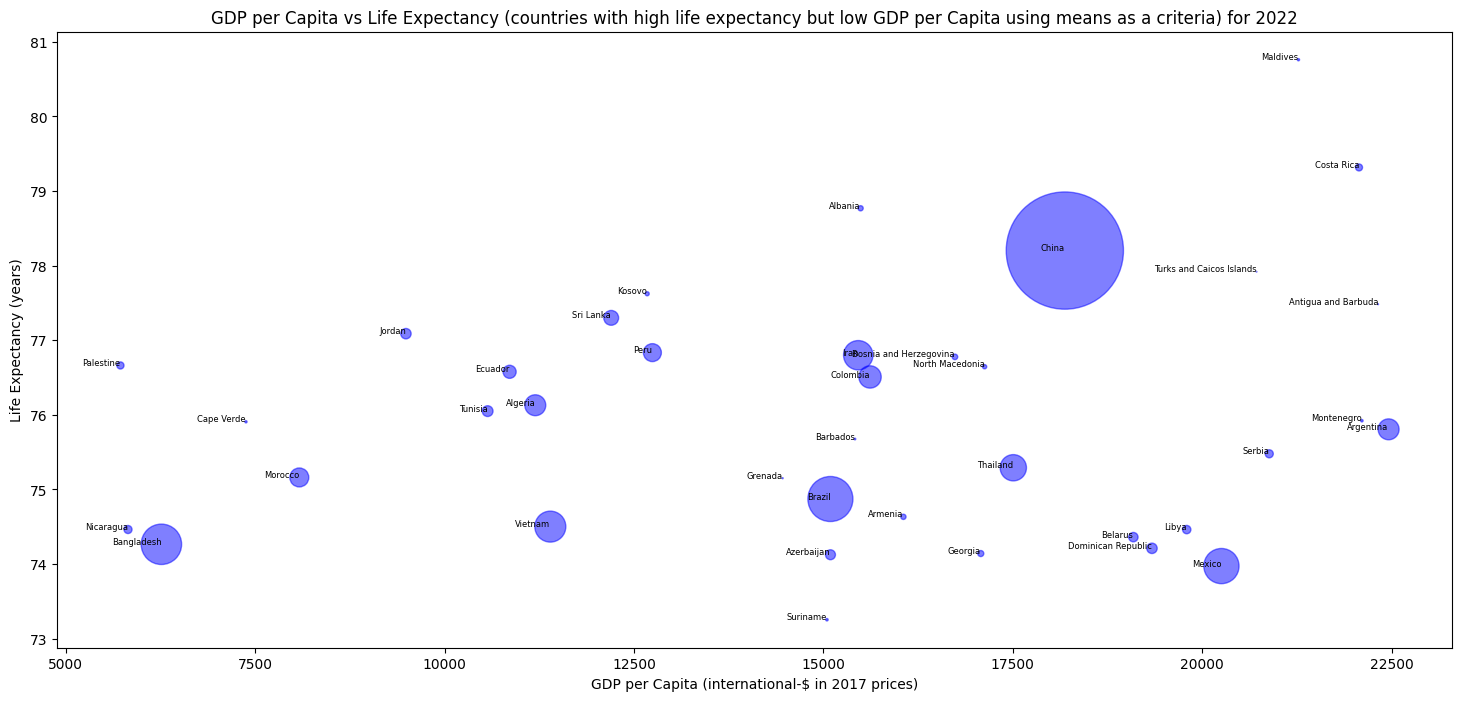

In [348]:
plt.figure(figsize=(18, 8))
plt.scatter(df_higher_life_expectancy_lower_GDP1['GDP per capita'], df_higher_life_expectancy_lower_GDP1['Life expectancy'], color='blue', s = df_higher_life_expectancy_lower_GDP1['Population']/200000, alpha=0.5)

for i, country in enumerate(df_higher_life_expectancy_lower_GDP1['Country']):
    plt.text(df_higher_life_expectancy_lower_GDP1['GDP per capita'].iloc[i], df_higher_life_expectancy_lower_GDP1['Life expectancy'].iloc[i], df_higher_life_expectancy_lower_GDP1['Country'].iloc[i], fontsize=6, ha='right')
    
plt.xlabel('GDP per Capita (international-$ in 2017 prices)')
plt.ylabel('Life Expectancy (years)')
plt.title('GDP per Capita vs Life Expectancy (countries with high life expectancy but low GDP per Capita using means as a criteria) for 2022')
plt.show()

In [349]:
# List countries with high life expectancy but low GDP using 75th percentile for high life expectancy and the 25th percentile for low GDP
upper_boundary_low_gdp = df['GDP per capita'].quantile(0.25)
print('The upper boundary for low GDP per capita is', upper_boundary_low_gdp)
lower_boundary_high_life_expectancy = df['Life expectancy'].quantile(0.75)
print('The lower boundary for high life expectancy is', lower_boundary_high_life_expectancy)
df_higher_life_expectancy_lower_GDP2 = df[(df['Life expectancy'] >= lower_boundary_high_life_expectancy) & (df['GDP per capita'] <= upper_boundary_low_gdp)]
print('The number of countries with high life expectancy but low GDP per capita using percentiles is', len(df_higher_life_expectancy_lower_GDP2))

The upper boundary for low GDP per capita is 5134.2526
The lower boundary for high life expectancy is 77.937
The number of countries with high life expectancy but low GDP per capita using percentiles is 0


#### 7. Find whether each strong economy (normally indicated by GDP) have high life expectancy?

In [350]:
lower_boundary_high_gdp = df['GDP per capita'].quantile(0.75)
print('The lower boundary for high GDP per capita is', lower_boundary_high_gdp)
df_higher_gdp = df[df['GDP per capita'] >= lower_boundary_high_gdp]
print('The number of countries with high GDP per capita using 75th percentile is', len(df_higher_gdp))

The lower boundary for high GDP per capita is 34831.84575
The number of countries with high GDP per capita using 75th percentile is 47


In [351]:
df_higher_gdp

,Country,Year,Life expectancy,GDP per capita,Population
2853,Aruba,2022,76.226,41273.613,107792.0
3579,Australia,2022,82.766,51090.260,26200987.0
3840,Austria,2022,81.296,55867.184,9064679.0
4624,Bahrain,2022,80.992,51854.715,1533459.0
5661,Belgium,2022,81.159,53287.152,11641813.0
6273,Bermuda,2022,82.062,81165.650,64772.0
7998,Brunei,2022,72.917,58669.902,455374.0
9564,Canada,2022,81.249,49296.380,38821260.0
9879,Cayman Islands,2022,79.984,71353.890,71609.0
13156,Cyprus,2022,80.434,44996.316,1331376.0


In [352]:
print('Mean life expectancy is', mean_life_expectancy)
print('75th Percentile life expectancy is', lower_boundary_high_life_expectancy)

Mean life expectancy is 72.75275
75th Percentile life expectancy is 77.937


In [353]:
df_higher_gdp[df_higher_gdp['Life expectancy'] > lower_boundary_high_life_expectancy]

,Country,Year,Life expectancy,GDP per capita,Population
3579,Australia,2022,82.766,51090.260,26200987.0
3840,Austria,2022,81.296,55867.184,9064679.0
4624,Bahrain,2022,80.992,51854.715,1533459.0
5661,Belgium,2022,81.159,53287.152,11641813.0
6273,Bermuda,2022,82.062,81165.650,64772.0
9564,Canada,2022,81.249,49296.380,38821260.0
9879,Cayman Islands,2022,79.984,71353.890,71609.0
13156,Cyprus,2022,80.434,44996.316,1331376.0
13417,Czechia,2022,79.165,41052.348,10673216.0
14024,Denmark,2022,81.291,59935.120,5902898.0


In [354]:
df_higher_gdp[(df_higher_gdp['Life expectancy'] >= mean_life_expectancy) & (df_higher_gdp['Life expectancy'] <= lower_boundary_high_life_expectancy)]

,Country,Year,Life expectancy,GDP per capita,Population
2853,Aruba,2022,76.226,41273.613,107792.0
7998,Brunei,2022,72.917,58669.902,455374.0
23864,Hungary,2022,76.212,35356.777,9684306.0
30715,Lithuania,2022,74.696,39955.246,2816922.0
40706,Oman,2022,77.911,35336.895,4730227.0
42983,Poland,2022,77.923,37706.605,38385734.0
46611,Saudi Arabia,2022,77.310,50188.297,32175352.0
48019,Sint Maarten (Dutch part),2022,76.180,41942.918,42163.0


In [355]:
df_higher_gdp[df_higher_gdp['Life expectancy'] < mean_life_expectancy]

,Country,Year,Life expectancy,GDP per capita,Population
22553,Guyana,2022,69.888,35634.688,821636.0


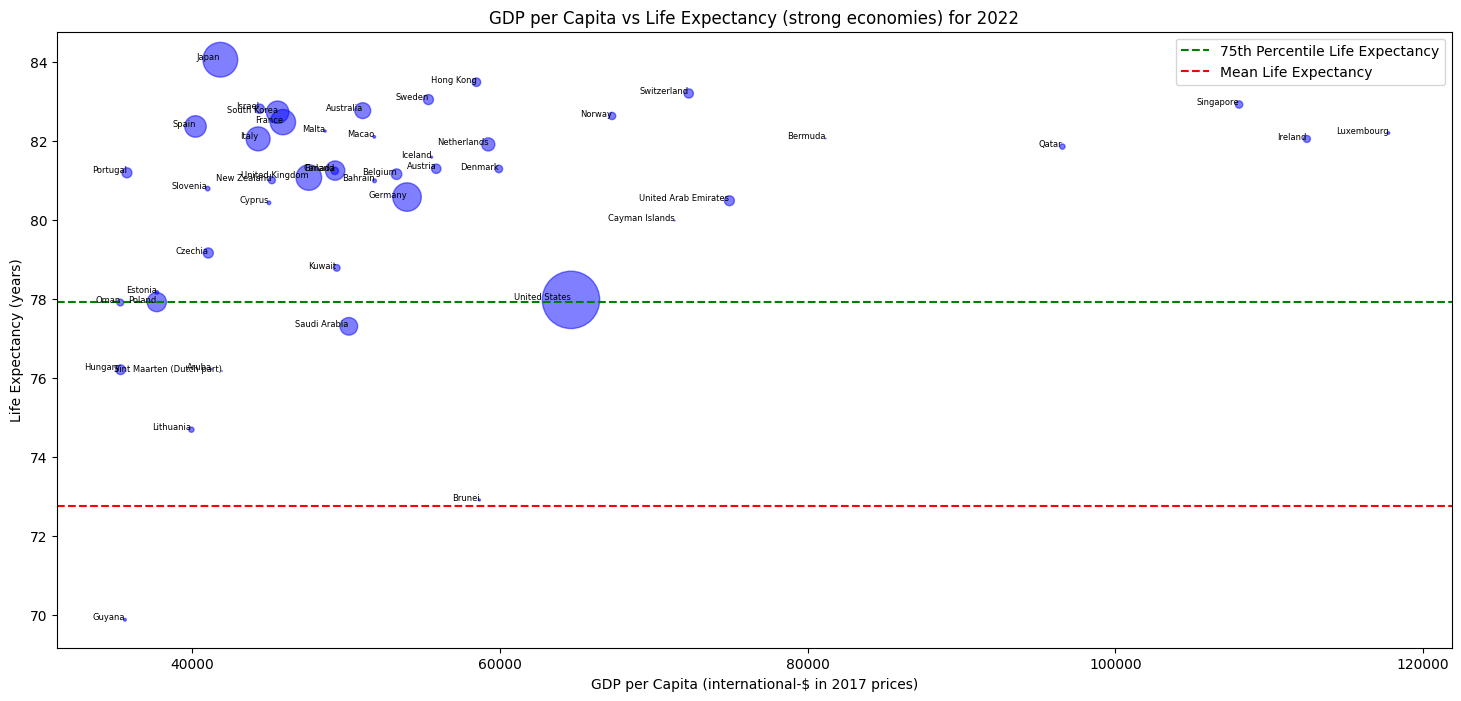

In [356]:
plt.figure(figsize=(18, 8))
plt.scatter(df_higher_gdp['GDP per capita'], df_higher_gdp['Life expectancy'], color='blue', s = df_higher_gdp['Population']/200000, alpha=0.5)

for i, country in enumerate(df_higher_gdp['Country']):
    plt.text(df_higher_gdp['GDP per capita'].iloc[i], df_higher_gdp['Life expectancy'].iloc[i], df_higher_gdp['Country'].iloc[i], fontsize=6, ha='right')
    
plt.axhline(y=lower_boundary_high_life_expectancy, color='green', linestyle='--', label='75th Percentile Life Expectancy')

plt.axhline(y=mean_life_expectancy, color='red', linestyle='--', label='Mean Life Expectancy')

plt.xlabel('GDP per Capita (international-$ in 2017 prices)')
plt.ylabel('Life Expectancy (years)')
plt.title('GDP per Capita vs Life Expectancy (strong economies) for 2022')
plt.legend()
plt.show()